In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

In [2]:
NUM_TRIALS = 2000
BANDIT_PROBABILITIES = [0.2, 0.5, 00.75]

In [3]:
class Bandit:
  def __init__(self, p):
    self.p = p
    self.a = 1
    self.b = 1
    self.N = 0

  def pull(self):
    return np.random.random() < self.p

  def sample(self):
    return np.random.beta(self.a, self.b)

  def update(self, x):
    self.a += x
    self.b += 1-x
    self.N += 1

In [4]:
def plot(bandits, trial):
  x = np.linspace(0, 1, 200)
  for bandit in bandits:
    y = beta.pdf(x, bandit.a, bandit.b)
    plt.plot(x, y, label=f"real p: {bandit.p:.4f}, win rate = {bandit.a-1}/{bandit.N}")
  plt.title(f"Bandit distributions after {trial} trials")
  plt.legend()
  plt.show()

In [5]:
def experiment():
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

  sample_points = [5, 10, 20, 50, 100, 200, 500, 1000, 1999]
  rewards = np.zeros(NUM_TRIALS)
  for i in range(NUM_TRIALS):
    # thompson sampling
    j = np.argmax([bandit.sample() for bandit in bandits])

    if i in sample_points:
      plot(bandits, i)

    x = bandits[j].pull()
    rewards[i] = x

    bandits[j].update(x)

  # total reward
  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)

  print("num of times selected each bandit:", [bandit.N for bandit in bandits])

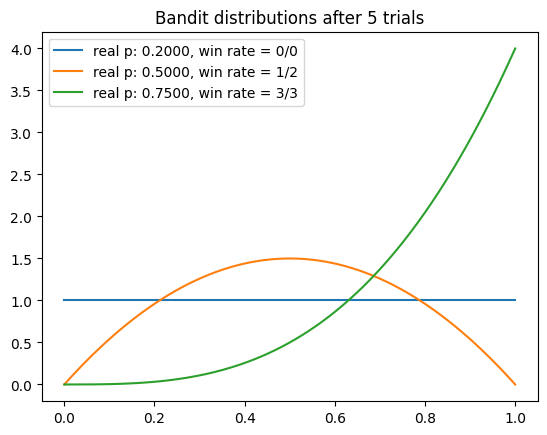

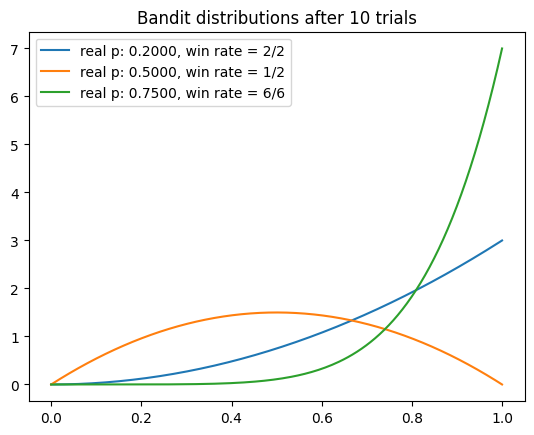

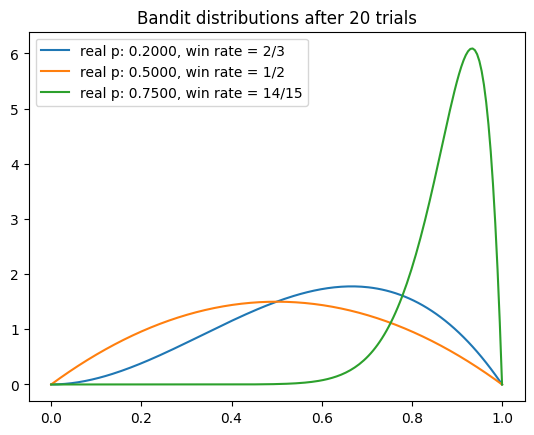

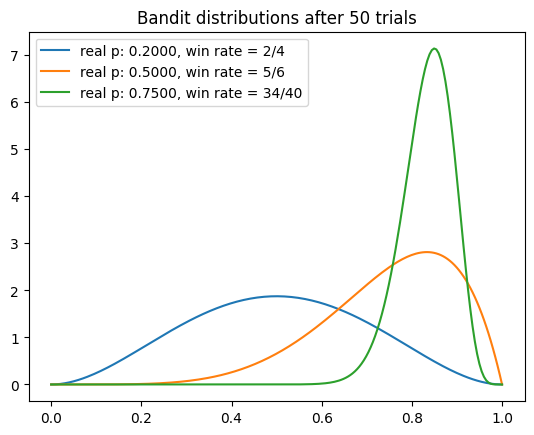

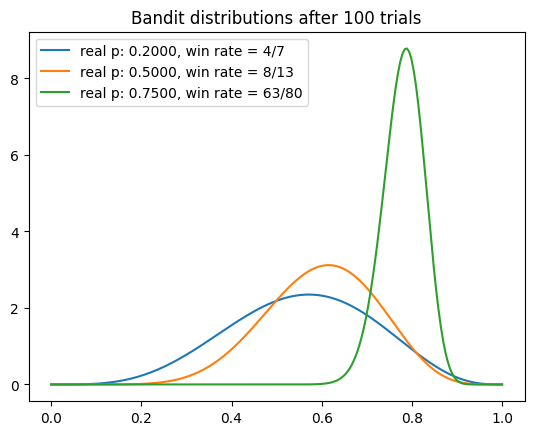

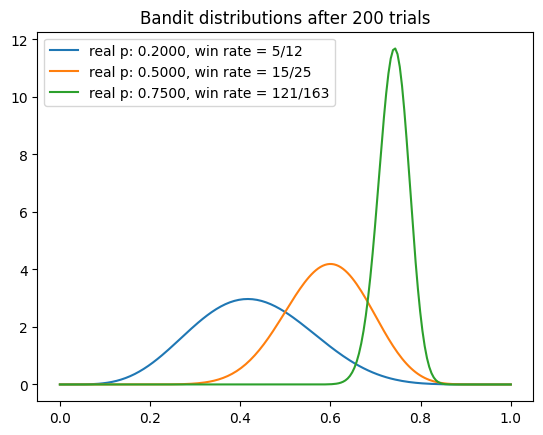

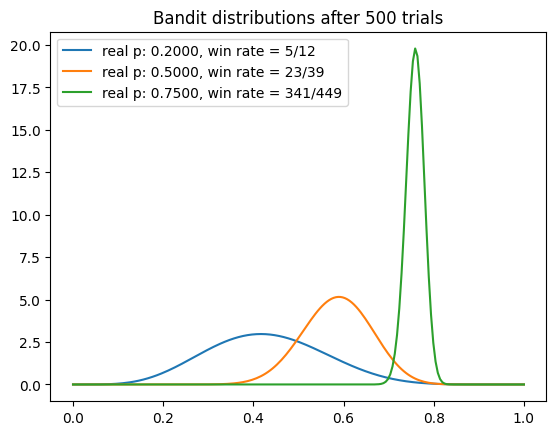

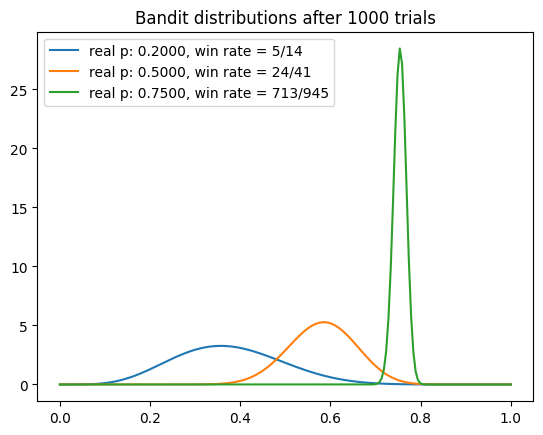

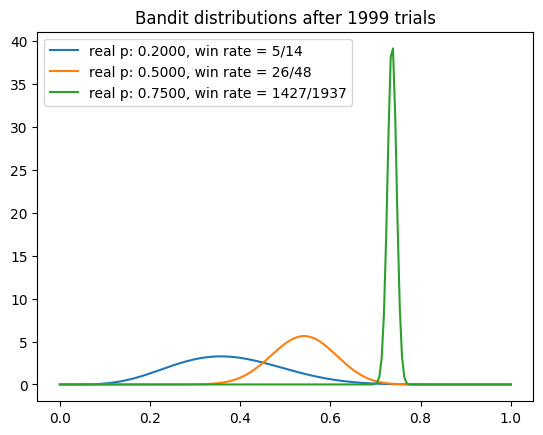

total reward earned: 1459.0
overall win rate: 0.7295
num of times selected each bandit: [14, 48, 1938]


In [6]:
experiment()